In [1]:
import open3d as o3d
import o3dmethods
import multibridgefunc as multibridge
import riverbank as riverbank

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# for converting txt to xyz files
# # bridgemethods.convertToXYZ()

In [3]:
pcd = o3d.io.read_point_cloud('data/slam_bridge_examples/bridge_monday_5_1_dense.pcd')
gnss = o3d.io.read_point_cloud('data/slam_bridge_odometry/bridge_monday_5_1.xyz')

In [4]:
pcd_sel, downpcd, gnss_sel = multibridge.preprocess(pcd, gnss)

# Note: I wrote pcd_sel, downpcd, gnss_sel to point clouds so I didn't have to read the dense cloud every time
# # o3d.io.write_point_cloud("pcd_sel.pcd", pcd_sel)
# # o3d.io.write_point_cloud("downpcd.pcd", downpcd)
# # o3d.io.write_point_cloud("gnss.pcd", gnss)

In [5]:
# Reading in the temporary point cloud files
# pcd_sel = o3d.io.read_point_cloud("pcd_sel.pcd")
# downpcd = o3d.io.read_point_cloud("downpcd.pcd")
# gnss_sel = o3d.io.read_point_cloud("gnss.pcd")
# o3d.visualization.draw_geometries([downpcd])
# gnss_sel.paint_uniform_color([0, 1, 0])
# o3d.visualization.draw_geometries([pcd_sel, gnss_sel])

In [6]:
# River bank detection
river_bank = riverbank.detect_riverbank(pcd_sel, gnss_sel)

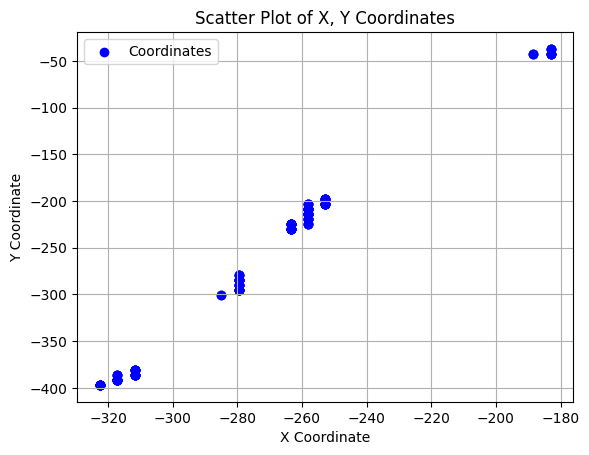

183


/home/lukas/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
# Multiple bridge detection
# Note: k-means algorithms requires inputting the number of clusters, but there is probably one you can find without this requirment
num_bridges = 3

# Bridges list - 0: cropped PCD, 1: midpoint, 2: slope, 3: bounding box
bridges = multibridge.find_bridges(pcd_sel, gnss_sel, num_bridges)

In [8]:
# bounding boxes of sections of river with bridges
bridgeBBSection = []
# Visualize just bounding boxes regions
for i in bridges:
    bridgeBBSection.append(i[3])
#o3d.visualization.draw_geometries([pcd_sel, bridgeBBSection[0], bridgeBBSection[1], bridgeBBSection[2]])

In [9]:
# Final Visual containing bridges, pcd_sel, gnss
final_visual = []
final_visual.append(pcd_sel)
final_visual.append(gnss_sel)

for n in bridges:
    final_visual.append(n[3])

for i in range(len(bridges)):
    finalbox, finalBRIDGE = o3dmethods.single_bridge_detection(downpcd, bridges[i])
    final_visual.append(finalBRIDGE)
    finalBRIDGE.paint_uniform_color([0, 0, 0])
    o3d.visualization.draw_geometries([finalBRIDGE])
    finalBRIDGE.paint_uniform_color([0, 1, 0])

    # crop from ORIGINAL point cloud and write file
    # bridgePCDOut = pcd.crop(finalbox)
    # outputname = "bridge_monday_5_1_dense_detection_" + i + ".pcd"
    # o3d.io.write_point_cloud(outputname, bridgePCDOut)

final_visual.append(river_bank)


In [10]:
o3d.visualization.draw_geometries(list(final_visual))

In [11]:
# pcd_combined = o3d.geometry.PointCloud()
# for pcd in final_visual:
#     pcd_combined += pcd

In [12]:
# pcd_combined.paint_uniform_color([0, 0, 0])
# o3d.visualization.draw_geometries([pcd_combined])
# o3d.io.write_point_cloud("bridge_monday_5_1_dense_detection.pcd", pcd_combined)